In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to ROOTaaS 6.06/06
ZYAM Index Range = 3 to 4
['../InputData/pT_Rebin_1/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_1/pPb_SE_L0_Correlation_GMB_Ratio.root']
ZYAM Index Range = 3 to 4
['../InputData/pT_Rebin_1/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_1/pPb_SE_L0_Correlation_GMB_Ratio.root']


In [2]:
print(N_dPhi_Bins)
print(dPhi_Bins)
for dphi in dPhi_Bins:
    print("%1.4f"%(dphi)),
print("")
print(len(delta_phi_centers))
print(delta_phi_centers)
print("UE points")
print(ue_error_bar)
print(dPhi_Bins[(len(dPhi_Bins)-N_Phi_Integrate):])
print(Integration_Width)

8
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793]
0.0000 0.3927 0.7854 1.1781 1.5708 1.9635 2.3562 2.7489 3.1416 
8
[0.19634954084936207, 0.5890486225480862, 0.9817477042468103, 1.3744467859455345, 1.7671458676442586, 2.1598449493429825, 2.552544031041707, 2.945243112740431]
UE points
[0.39269908169872414, 0.7853981633974483]
[2.356194490192345, 2.748893571891069, 3.141592653589793]
1.0471975512


In [3]:
Corrs = ROOT_to_nparray()

In [4]:
reload(functions_root_nparray)
from functions_root_nparray import *

In [5]:
print_from_Dict(Corrs)

p-Pb_Uncorr_Error:
0.0187 0.0187 0.0187 0.0187 0.0187 0.0187 0.0187 0.0187 
0.0158 0.0158 0.0158 0.0158 0.0158 0.0158 0.0158 0.0158 
0.0108 0.0108 0.0108 0.0108 0.0108 0.0108 0.0108 0.0108 
0.0068 0.0068 0.0068 0.0068 0.0068 0.0068 0.0068 0.0068 
0.0036 0.0036 0.0036 0.0036 0.0036 0.0036 0.0036 0.0036 
0.0012 0.0012 0.0012 0.0012 0.0012 0.0012 0.0012 0.0012 
0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 

pp_CBR_Errors:
0.0078 0.0072 0.0069 0.0066 0.0069 0.0072 0.0078 0.0084 
0.0064 0.0059 0.0055 0.0056 0.0058 0.0059 0.0067 0.0072 
0.0045 0.0042 0.0039 0.0039 0.0039 0.0045 0.0050 0.0060 
0.0027 0.0025 0.0025 0.0025 0.0026 0.0029 0.0035 0.0045 
0.0015 0.0013 0.0014 0.0013 0.0015 0.0019 0.0023 0.0035 
0.0006 0.0007 0.0009 0.0008 0.0009 0.0011 0.0012 0.0019 
0.0002 0.0003 0.0003 0.0004 0.0006 0.0004 0.0004 0.0011 

pp_Uncorr_Error:
0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 
0.0133 0.0133 0.0133 0.0133 0.0133 0.0133 0.0133 0.0133 
0.0087 0.0087 0.0087 0.0087 0.0087 

In [6]:
reload(functions_correlations)
from functions_correlations import *

In [7]:
Show_Plots = False

Correlated_Subtraction_Weights(Corrs)
print_from_Dict(Corrs)

if (Show_Plots):
    Plot_UB_Subtraction(Corrs)
Ped_Sub_After_Cs(Corrs)
print("--------------")
print_from_Dict(Corrs)

if (Show_Plots):
    Plot_pp_pPb_Cs(Corrs)

p-Pb_Uncorr_Error:
0.0187 0.0187 0.0187 0.0187 0.0187 0.0187 0.0187 0.0187 
0.0158 0.0158 0.0158 0.0158 0.0158 0.0158 0.0158 0.0158 
0.0108 0.0108 0.0108 0.0108 0.0108 0.0108 0.0108 0.0108 
0.0068 0.0068 0.0068 0.0068 0.0068 0.0068 0.0068 0.0068 
0.0036 0.0036 0.0036 0.0036 0.0036 0.0036 0.0036 0.0036 
0.0012 0.0012 0.0012 0.0012 0.0012 0.0012 0.0012 0.0012 
0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 

pp_CBR_Errors:
0.0078 0.0072 0.0069 0.0066 0.0069 0.0072 0.0078 0.0084 
0.0064 0.0059 0.0055 0.0056 0.0058 0.0059 0.0067 0.0072 
0.0045 0.0042 0.0039 0.0039 0.0039 0.0045 0.0050 0.0060 
0.0027 0.0025 0.0025 0.0025 0.0026 0.0029 0.0035 0.0045 
0.0015 0.0013 0.0014 0.0013 0.0015 0.0019 0.0023 0.0035 
0.0006 0.0007 0.0009 0.0008 0.0009 0.0011 0.0012 0.0019 
0.0002 0.0003 0.0003 0.0004 0.0006 0.0004 0.0004 0.0011 

pp_Uncorr_Error:
0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 0.0155 
0.0133 0.0133 0.0133 0.0133 0.0133 0.0133 0.0133 0.0133 
0.0087 0.0087 0.0087 0.0087 0.0087 

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [8]:
Frags = Get_Fragmentation(Corrs)
print_from_Dict(Frags)

pp_purity_FF_Errors:
1.29568059238 0.525993626415 0.362902479507 0.108531920459 0.0509897821512 0.0115525895462 0.0018833699543 

p-Pb_FF_Errors:
1.57143239816 0.869821866043 0.40945790286 0.170815145874 0.0658481100627 0.0233497193099 0.00663663684314 

pp_FF_Errors:
1.34167766643 0.740402765574 0.364730935463 0.163317013609 0.0741765696436 0.026396904465 0.00929062804472 

p-Pb_purity_FF_Errors:
1.67814275639 1.01735521956 0.491025143875 0.143724237831 0.0514831371007 0.0152377151187 0.00183808419227 



## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [9]:
Combined_Frags = Average_FF(Frags)

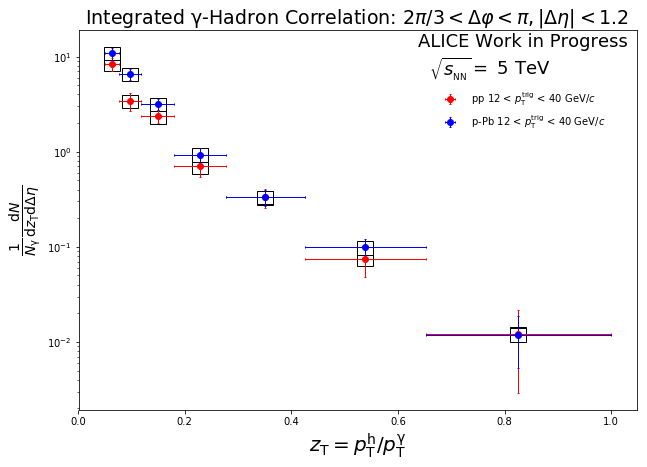

                    pp Central Values:
[ 8.39714579  3.40889969  2.35192612  0.70338196  0.33045848  0.07487091
  0.01220589]

                    pp Stat. Uncertainty:
[ 1.34167767  0.74040277  0.36473094  0.16331701  0.07417657  0.0263969
  0.00929063]

                    p-Pb Central Values:
[ 10.8758358    6.59335344   3.18227327   0.93145902   0.33365585
   0.09875375   0.0119124 ]

                    p-Pb Stat. Uncertainty:
[ 1.5714324   0.86982187  0.4094579   0.17081515  0.06584811  0.02334972
  0.00663664]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 16\%-76\% & 13\%-56\% \\
\hline
Purity & 15\%-15\% & 15\%-15\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [10]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

In [11]:
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.32400385  0.27865427  0.24507645  0.22851975  0.23264703  0.2564616
  0.29523722  0.34395062  0.39897819  0.4580499   0.51978878  0.5833486
  0.64819392  0.71397456  0.78045406  0.84746797  0.91489886  0.9826609
  1.05069002  1.1189375 ]


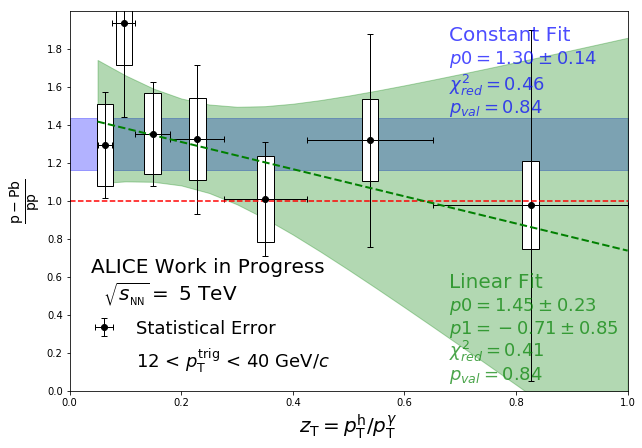

                Central Values:
[ 1.29518244  1.93415883  1.35304985  1.32425776  1.00967556  1.31898697
  0.97595493]

                Ratio Uncertainty from Purity:
[ 0.1949395   0.17370317  0.19186809  0.19335205  0.21717029  0.193633
  0.22091779]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.09158323  0.13676568  0.09567507  0.09363916  0.07139484  0.09326646
  0.06901043]

                Full Systematic Uncertainty:
[ 0.21538082  0.22108289  0.21439936  0.21483321  0.2286048   0.21492411
  0.23144569]

****************************************
Minimizer is Linear
Chi2                      =      2.75712
NDf                       =            6
p0                        =      1.29857   +/-   0.138275    

****************************************
Minimizer is Linear
Chi2                      =      2.04877
NDf                       =            5
p0                        =      1.45225   +/-   0.229052    
p1                        =     -0.71405   +/-   0.

In [12]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [13]:
reload(functions_correlations)
from functions_correlations import *

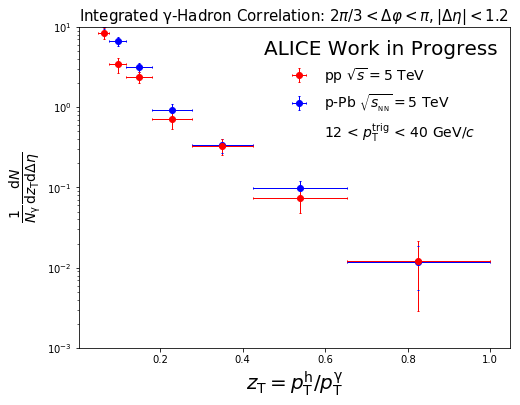

In [14]:
Plot_FF(Frags)

In [15]:
reload(functions_fragmentation)
from functions_fragmentation import *

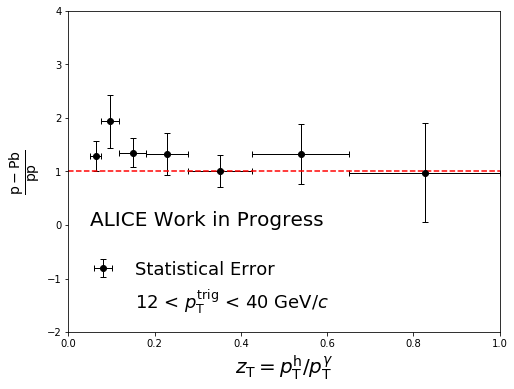

In [16]:
FF_Ratio(Frags)

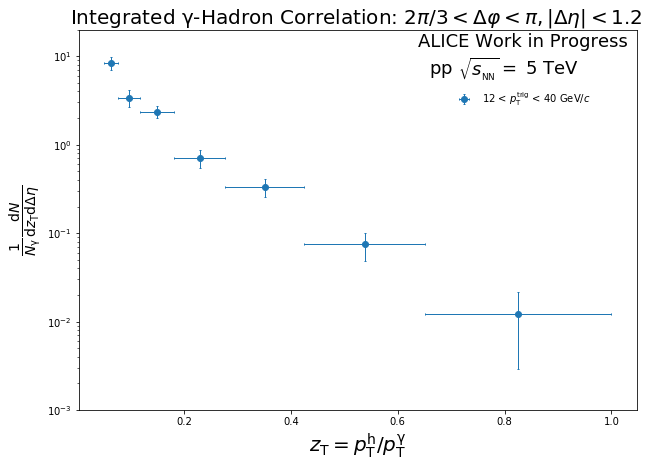

                             PROTON-PROTON:
Central Values
[[ 8.39714579  3.40889969  2.35192612  0.70338196  0.33045848  0.07487091
   0.01220589]]
Statistical Errors (Relative)
[[ 0.15977782  0.21719699  0.15507755  0.23218823  0.22446563  0.35256559
   0.76115954]]
Relative Uncertainty from Purity
[[ 1.29568059  0.52599363  0.36290248  0.10853192  0.05098978  0.01155259
   0.00188337]]




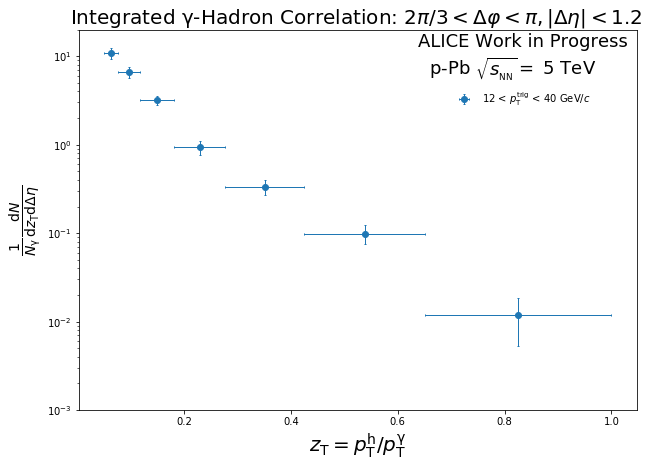

                              PROTON-LEAD:
Central Values
[[ 10.8758358    6.59335344   3.18227327   0.93145902   0.33365585
    0.09875375   0.0119124 ]]
Statistical Errors (Relative)
[[ 0.14448843  0.13192405  0.12866837  0.1833845   0.19735338  0.23644388
   0.55712021]]
Relative Uncertainty from Purity
[[ 1.67814276  1.01735522  0.49102514  0.14372424  0.05148314  0.01523772
   0.00183808]]




In [17]:
Overlay_pT_FF(Frags)

## Compare Track Cuts

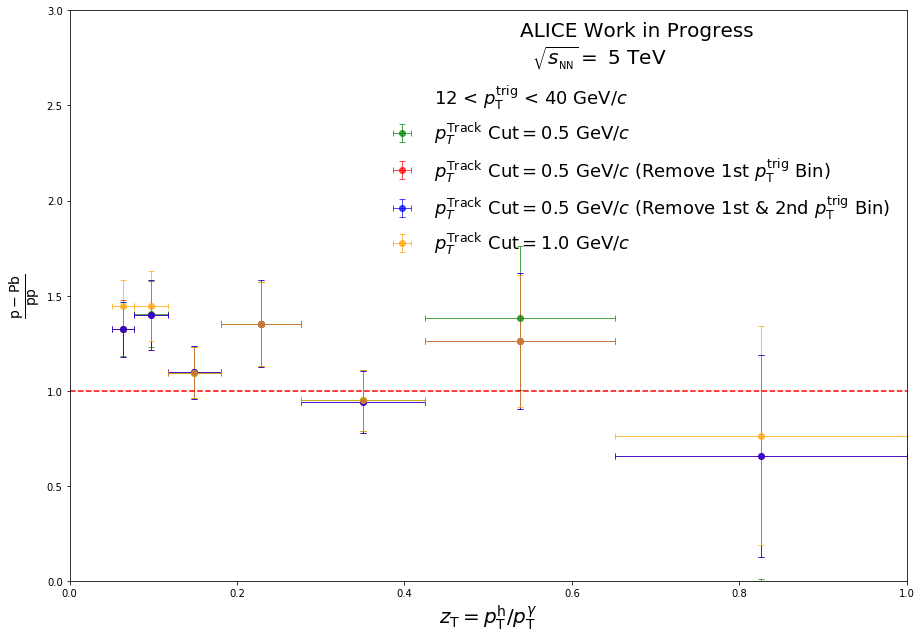

                Central Values:
[ 1.4457051   1.4481745   1.09574319  1.3500227   0.94988511  1.26222862
  0.76439433]

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   

****************************************
Minimizer is Linear
Chi2                      =      6.55659
NDf                       =            6
p0                        =      1.18867   +/-   0.0714348   

****************************************
Minimizer is Linear
Chi2                      =      6.59049
NDf                       =            6
p0                        =      1.19041   +/-   0.070857    

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   


In [18]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

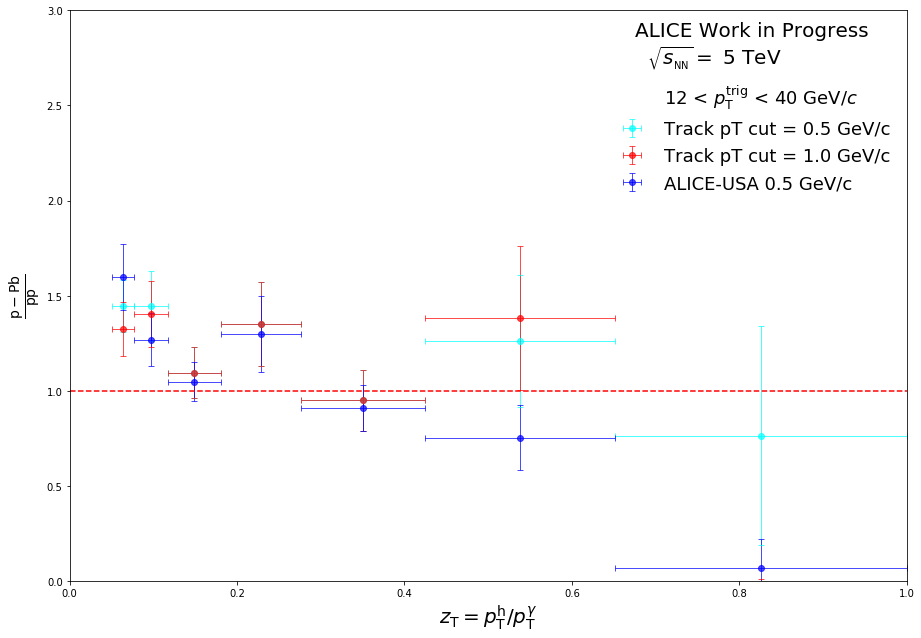

                Central Values:
[ 1.5979682   1.26981434  1.04878313  1.29933689  0.91089677  0.75447711
  0.07122347]

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   

****************************************
Minimizer is Linear
Chi2                      =      58.2675
NDf                       =            6
p0                        =     0.975847   +/-   0.0534109   


In [19]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

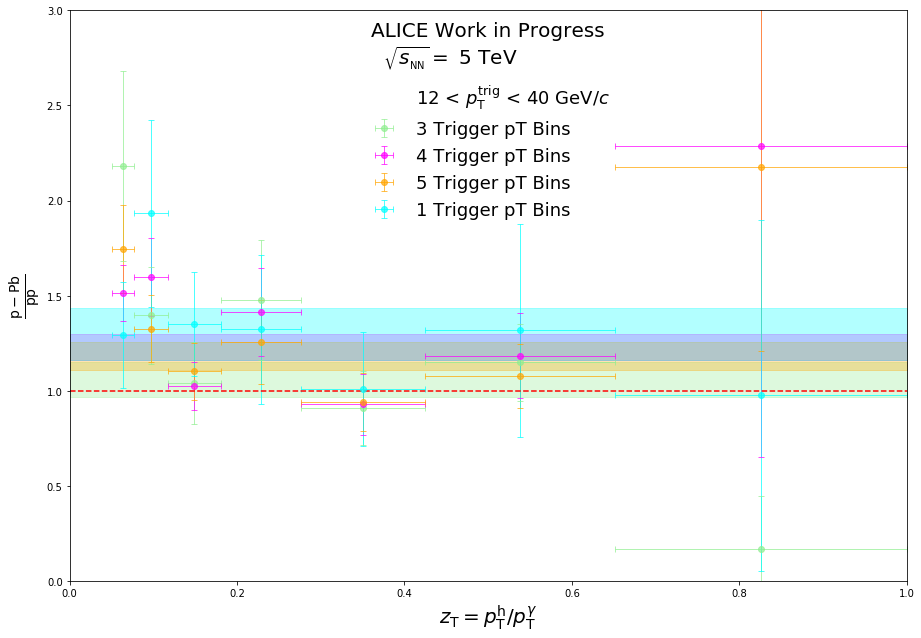

                Central Values:
[ 1.29518244  1.93415883  1.35304985  1.32425776  1.00967556  1.31898697
  0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      19.7879
NDf                       =            6
p0                        =      1.05868   +/-   0.093368    

****************************************
Minimizer is Linear
Chi2                      =      14.1856
NDf                       =            6
p0                        =      1.23139   +/-   0.0688764   

****************************************
Minimizer is Linear
Chi2                      =      10.9787
NDf                       =            6
p0                        =      1.18319   +/-   0.0716699   

****************************************
Minimizer is Linear
Chi2                      =      2.75712
NDf                       =            6
p0                        =      1.29857   +/-   0.138275    


In [20]:
strings = ["pT_Rebin_3","pT_Rebin_4","pT_Rebin_5","pT_Rebin_1"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins","1 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange","cyan"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

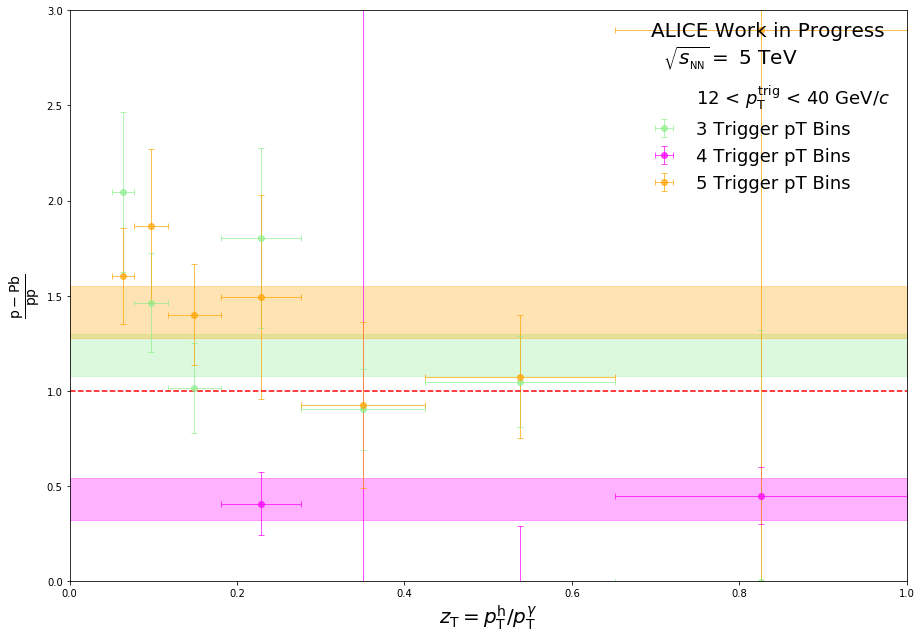

                Central Values:
[ 1.60368295  1.86557271  1.40054509  1.49282524  0.92696167  1.07433435
  2.89808321]

****************************************
Minimizer is Linear
Chi2                      =       9.6993
NDf                       =            5
p0                        =      1.18761   +/-   0.110241    

****************************************
Minimizer is Linear
Chi2                      =     0.034672
NDf                       =            1
p0                        =     0.430282   +/-   0.111733    

****************************************
Minimizer is Linear
Chi2                      =      4.29334
NDf                       =            6
p0                        =      1.41525   +/-   0.135751    


In [21]:
strings = ["pT_Rebin_3_Cut","pT_Rebin_4_Cut","pT_Rebin_5_Cut"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [22]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


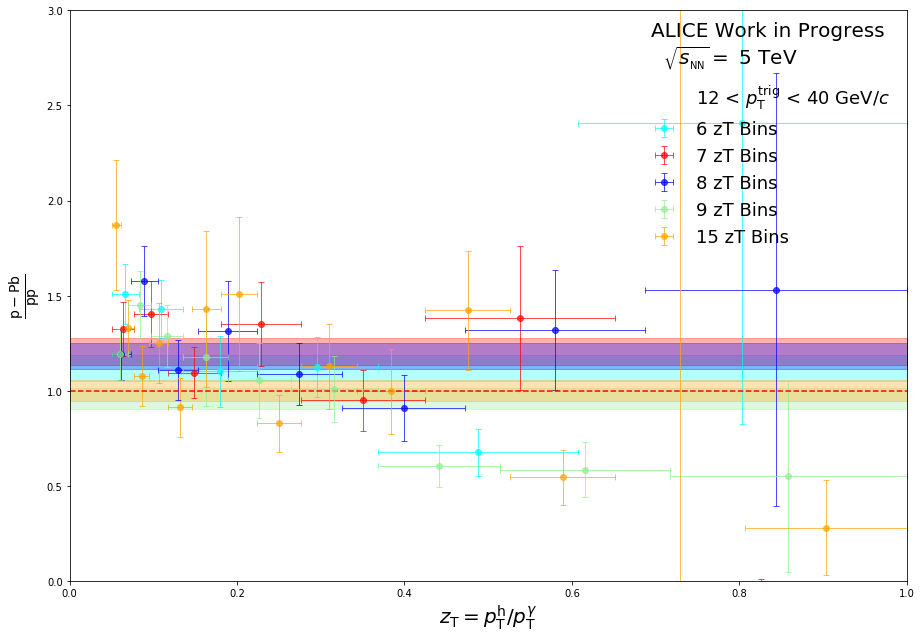

                Central Values:
[ 1.87060069  1.33279792  1.07594827  1.25077422  0.91343145  1.42914142
  1.50908939  0.82971572  1.12926386  0.9983693   1.42230144  0.54562724
  8.00428232  0.28118115]

****************************************
Minimizer is Linear
Chi2                      =      23.6267
NDf                       =            5
p0                        =      1.12038   +/-   0.0677459   

****************************************
Minimizer is Linear
Chi2                      =       5.8766
NDf                       =            5
p0                        =      1.20706   +/-   0.0696382   

****************************************
Minimizer is Linear
Chi2                      =      8.12662
NDf                       =            7
p0                        =      1.18291   +/-   0.0673123   

****************************************
Minimizer is Linear
Chi2                      =       33.127
NDf                       =            8
p0                        =     0.

In [23]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8","zT_Rebin_9","zT_Rebin_15"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins","9 zT Bins","15 zT Bins"]
colors = ["cyan","red","blue","lightgreen","orange"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


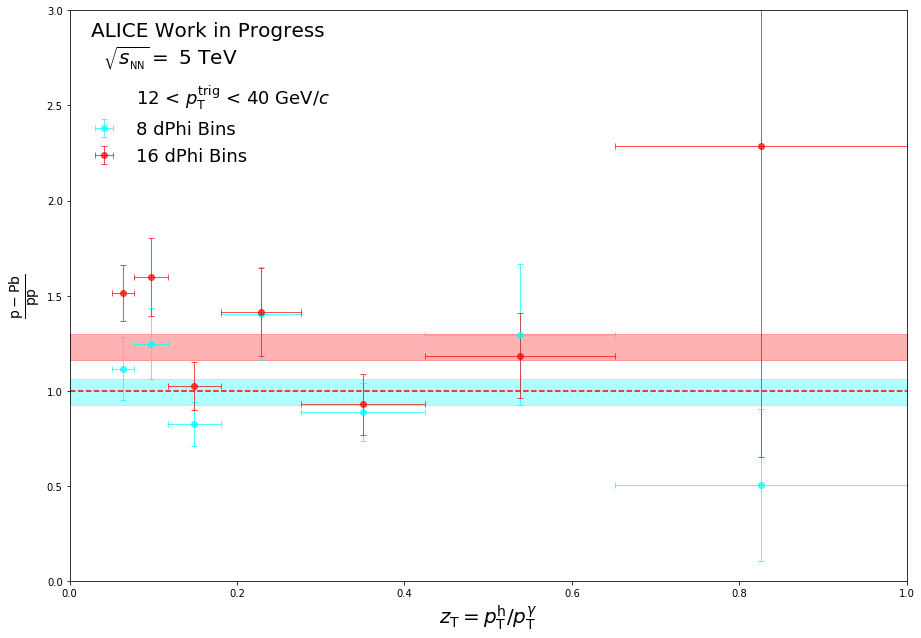

                Central Values:
[ 1.51527351  1.59959705  1.02588182  1.41358717  0.92988733  1.18494622
  2.28851581]

****************************************
Minimizer is Linear
Chi2                      =      10.0649
NDf                       =            6
p0                        =     0.994347   +/-   0.0679332   

****************************************
Minimizer is Linear
Chi2                      =      14.1856
NDf                       =            6
p0                        =      1.23139   +/-   0.0688764   


In [24]:
strings = ["dPhi_Rebin_16","pT_Rebin_4"]
string_descriptions = ["8 dPhi Bins", "16 dPhi Bins"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


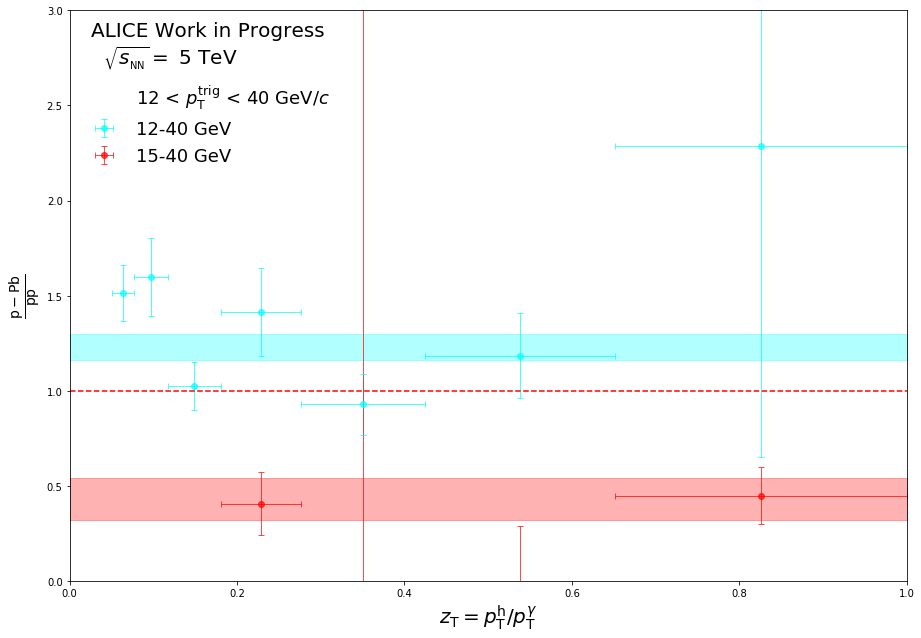

                Central Values:
[-0.90242957 -1.61305282 -0.68465468  0.40750914 -0.76863004 -0.03656446
  0.44928937]

****************************************
Minimizer is Linear
Chi2                      =      14.1856
NDf                       =            6
p0                        =      1.23139   +/-   0.0688764   

****************************************
Minimizer is Linear
Chi2                      =     0.034672
NDf                       =            1
p0                        =     0.430282   +/-   0.111733    


In [25]:
strings = ["pT_Rebin_4","pT_Rebin_4_Cut"]
string_descriptions = ["12-40 GeV", "15-40 GeV"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


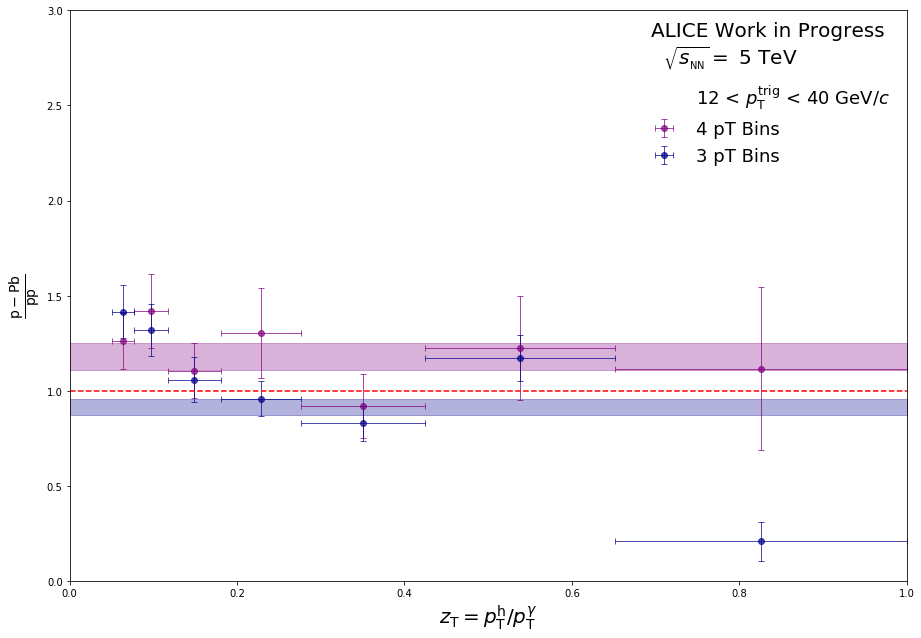

                Central Values:
[ 1.41661878  1.31934069  1.05935782  0.95893096  0.8298763   1.17231065
  0.20835547]

****************************************
Minimizer is Linear
Chi2                      =      4.71011
NDf                       =            6
p0                        =      1.18104   +/-   0.0723093   

****************************************
Minimizer is Linear
Chi2                      =      77.9708
NDf                       =            6
p0                        =     0.915002   +/-   0.0416071   


In [26]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights"]
string_descriptions = ["4 pT Bins", "3 pT Bins"]
colors = ["purple","darkblue"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


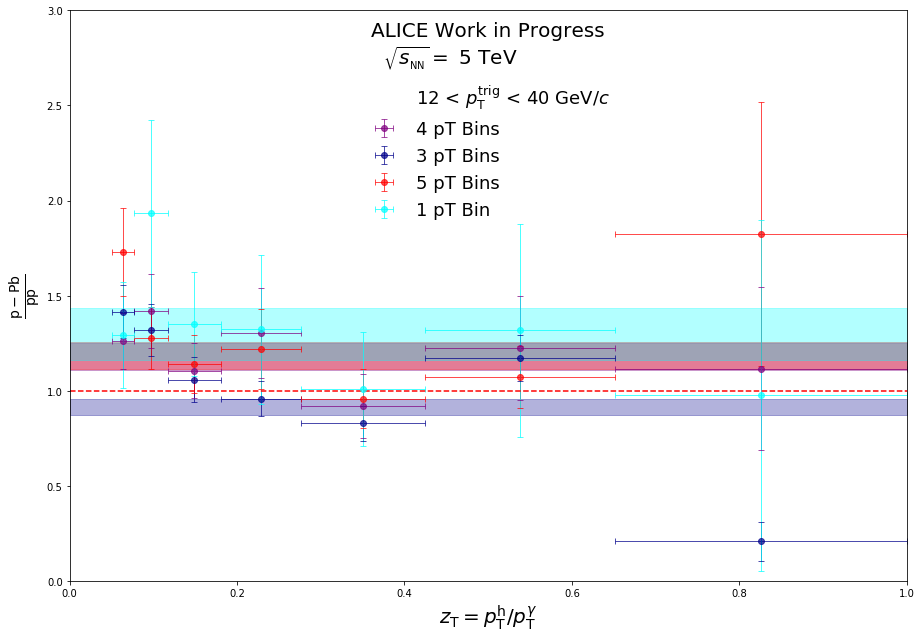

                Central Values:
[ 1.29518244  1.93415883  1.35304985  1.32425776  1.00967556  1.31898697
  0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      4.71011
NDf                       =            6
p0                        =      1.18104   +/-   0.0723093   

****************************************
Minimizer is Linear
Chi2                      =      77.9708
NDf                       =            6
p0                        =     0.915002   +/-   0.0416071   

****************************************
Minimizer is Linear
Chi2                      =      9.40712
NDf                       =            6
p0                        =      1.18678   +/-   0.0703174   

****************************************
Minimizer is Linear
Chi2                      =      2.75712
NDf                       =            6
p0                        =      1.29857   +/-   0.138275    


In [27]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights","pT_Rebin_5_Weights","pT_Rebin_1"]
string_descriptions = ["4 pT Bins", "3 pT Bins","5 pT Bins","1 pT Bin"]
colors = ["purple","darkblue","red","cyan"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


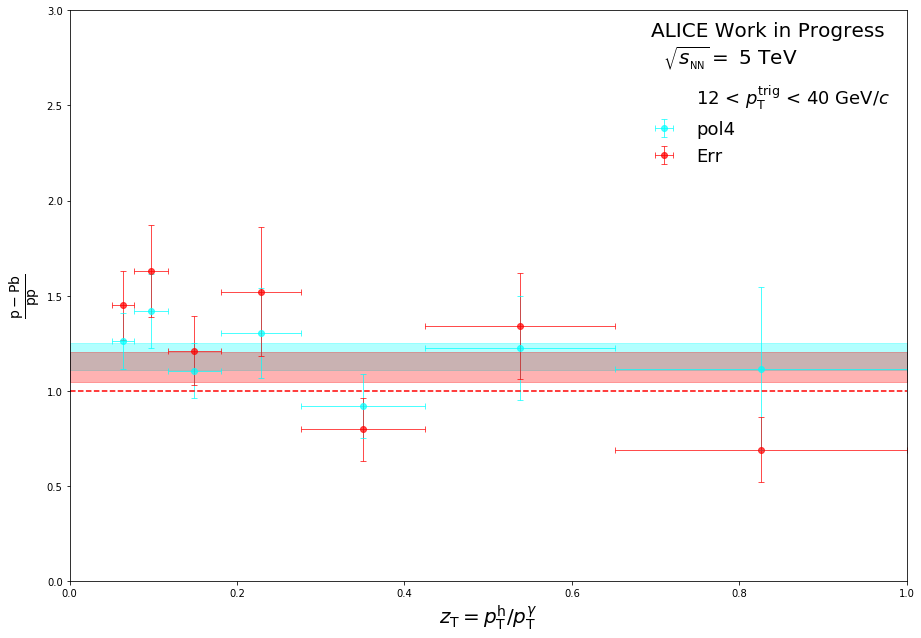

                Central Values:
[ 1.44859362  1.62998508  1.2101335   1.52003152  0.79741997  1.33920484
  0.69125875]

****************************************
Minimizer is Linear
Chi2                      =      4.71011
NDf                       =            6
p0                        =      1.18104   +/-   0.0723093   

****************************************
Minimizer is Linear
Chi2                      =      20.1565
NDf                       =            6
p0                        =      1.12499   +/-   0.0765666   


In [28]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_4_ErrWeights"]
string_descriptions = ["pol4", "Err"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


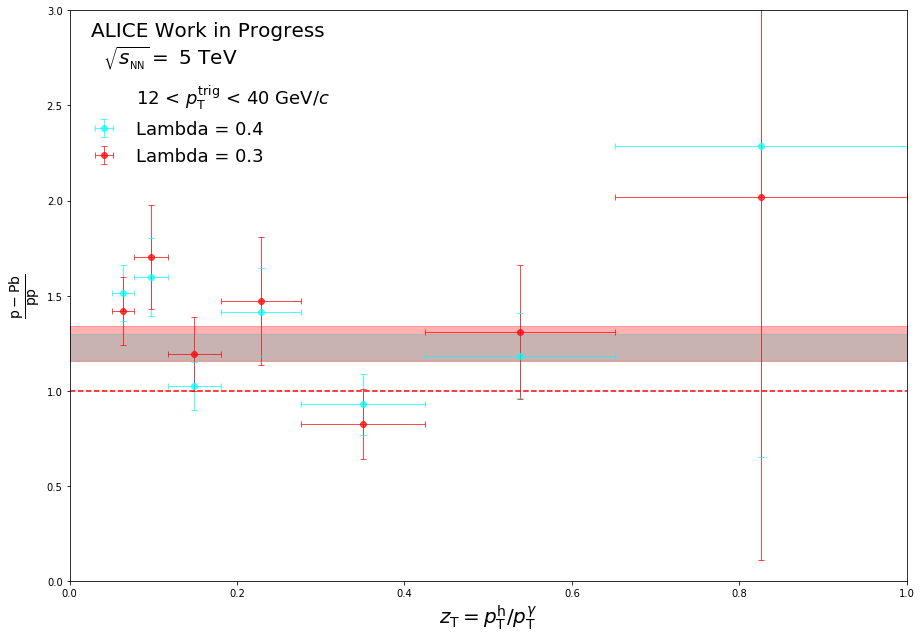

                Central Values:
[ 1.41941026  1.70222614  1.19527022  1.4729536   0.82636153  1.31005331
  2.01777407]

****************************************
Minimizer is Linear
Chi2                      =      14.1856
NDf                       =            6
p0                        =      1.23139   +/-   0.0688764   

****************************************
Minimizer is Linear
Chi2                      =      9.58895
NDf                       =            6
p0                        =      1.25085   +/-   0.0923795   


In [29]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


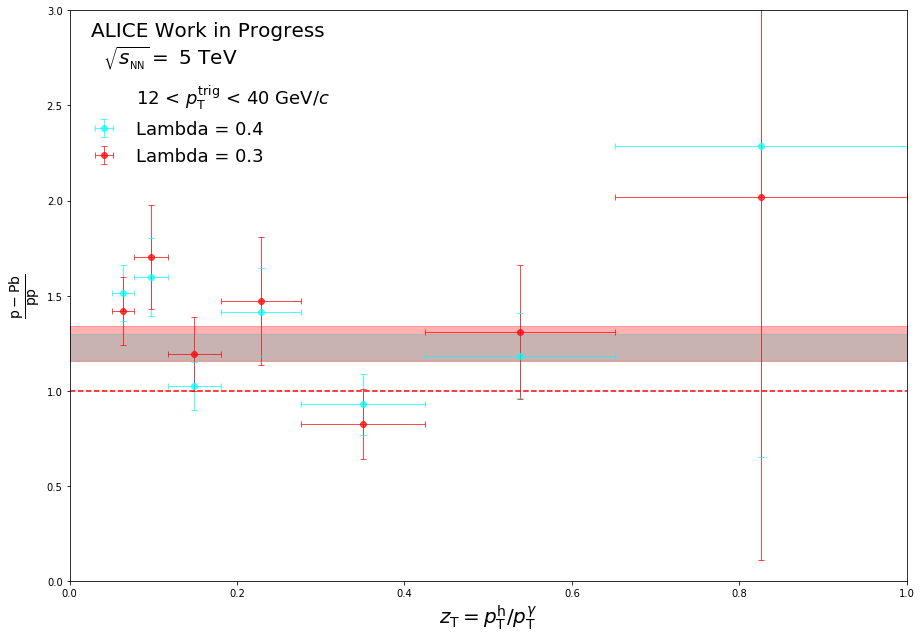

                Central Values:
[ 1.41941026  1.70222614  1.19527022  1.4729536   0.82636153  1.31005331
  2.01777407]

****************************************
Minimizer is Linear
Chi2                      =      14.1856
NDf                       =            6
p0                        =      1.23139   +/-   0.0688764   

****************************************
Minimizer is Linear
Chi2                      =      9.58895
NDf                       =            6
p0                        =      1.25085   +/-   0.0923795   


In [30]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [31]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

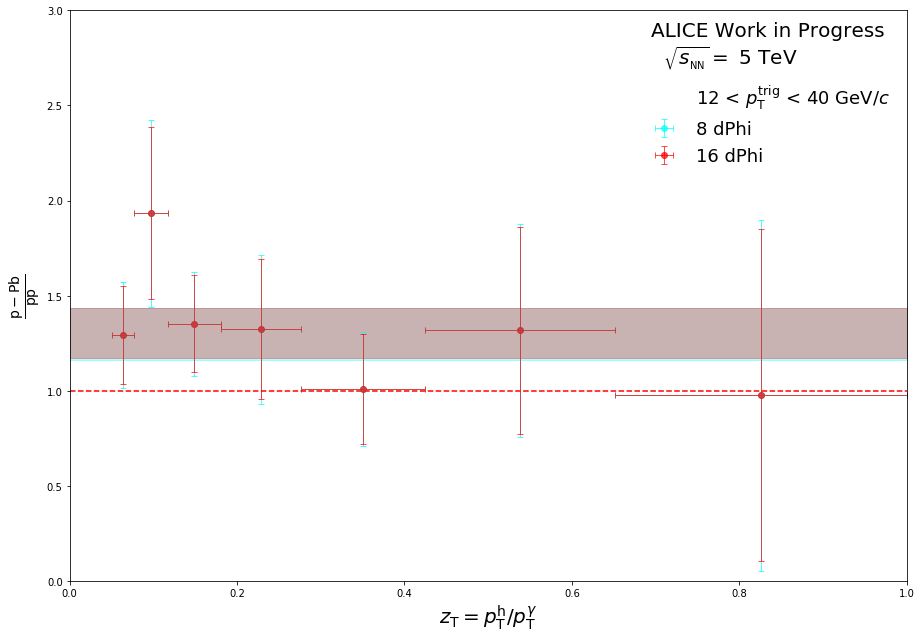

                Central Values:
[ 1.29518244  1.93415883  1.35304985  1.32425776  1.00967556  1.31898697
  0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      2.75712
NDf                       =            6
p0                        =      1.29857   +/-   0.138275    

****************************************
Minimizer is Linear
Chi2                      =      3.15605
NDf                       =            6
p0                        =      1.30341   +/-   0.129849    


In [32]:
strings = ["pT_Rebin_1","pT_Rebin_1_16dPhi"]
string_descriptions = ["8 dPhi", "16 dPhi"]
colors = ["cyan","red"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


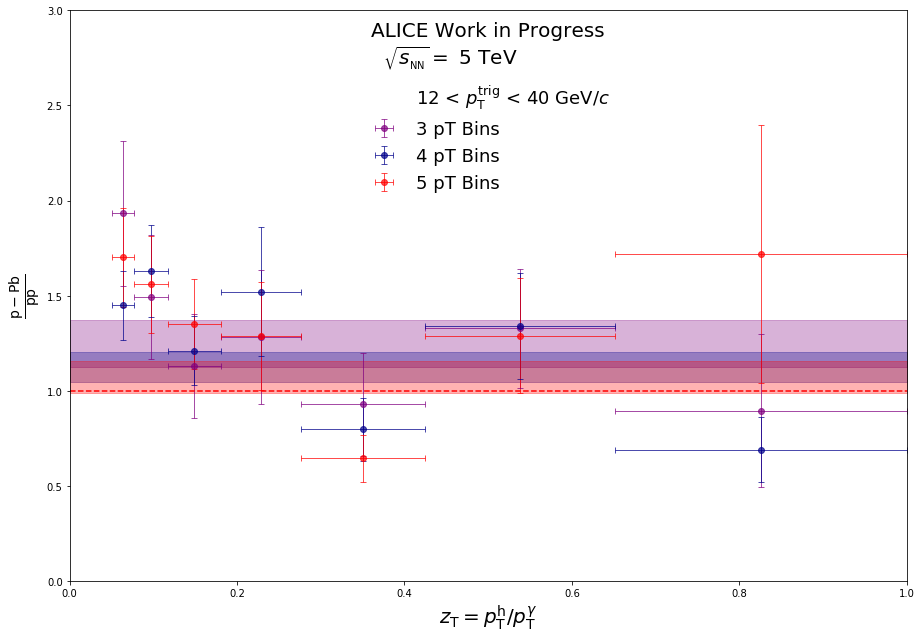

                Central Values:
[ 1.70228779  1.56044441  1.34968643  1.28675624  0.64593203  1.28956529
  1.71962152]

****************************************
Minimizer is Linear
Chi2                      =      6.21788
NDf                       =            6
p0                        =      1.24929   +/-   0.121704    

****************************************
Minimizer is Linear
Chi2                      =      20.1565
NDf                       =            6
p0                        =      1.12499   +/-   0.0765666   

****************************************
Minimizer is Linear
Chi2                      =      24.9289
NDf                       =            6
p0                        =      1.07209   +/-   0.0846063   


In [33]:
strings = ["pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights","pT_Rebin_5_ErrWeights"]
string_descriptions = ["3 pT Bins", "4 pT Bins","5 pT Bins"]
colors = ["purple","darkblue","red",]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [34]:
print(pTbins)

[12.0, 40.0]
